In [133]:
import numpy as np
from pathlib import Path
from tire_env.dataclasses import OccPlacementPairV2\

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap

In [152]:
data_dir = Path("../../../dataset/tire_mask_v2_p")
data_list = list(data_dir.glob("*.npz"))

In [153]:
cmap = plt.get_cmap('tab20', 16)
colors = cmap(np.linspace(0, 1, 16))[:, :3]  # (15, 3), RGBA → RGB
colors[0] = np.array([0,0,0]) # not placeable
colors[1] = np.array([1,1,1]) # placeable
colors[2] = np.array([0,1,0]) # stable
colors[3] = np.array([1,0,0]) # unstable
custom_cmap = ListedColormap(colors)

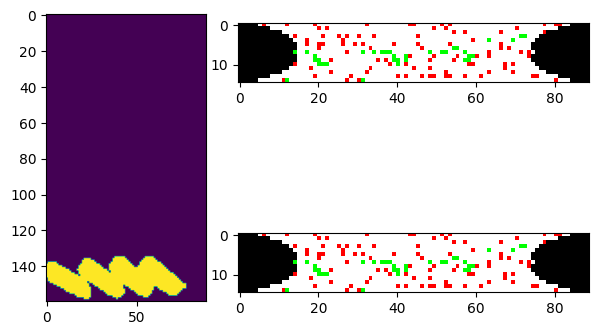

In [157]:
idx = np.random.randint(len(data_list))
data = OccPlacementPairV2.load(data_list[idx])

fig = plt.figure(figsize=(7, 5))
gs = gridspec.GridSpec(2, 3, figure=fig)
ax0 = fig.add_subplot(gs[:,0])
ax1 = fig.add_subplot(gs[0,1:])
ax2 = fig.add_subplot(gs[1,1:])

mask = data.placeable.astype(int)
mask[data.stable] = 2
mask[data.unstable] = 3
ax0.imshow(data.occ[0])
ax1.imshow(colors[mask.T])
ax2.imshow(colors[mask.T])
#fig.tight_layout()

In [ ]:
class_mask = np.argmax(data.placements, axis=-1)
invalid_2d = data.placements.sum(axis=-1) == 0
class_mask = class_mask + 1
class_mask[invalid_2d] = 0
placements = colors[class_mask]

class_mask = np.argmax(data.valid, axis=-1)
invalid_2d = (~data.valid).sum(axis=-1) == 0
class_mask = class_mask + 1
class_mask[invalid_2d] = 0
valid = colors[class_mask]
print(valid.shape, valid.max())

fig, ax = plt.subplots(1, 3)
mappable = ax[0].imshow(data.occ[0], cmap=custom_cmap, vmin=0, vmax=15)
ax[1].imshow(valid)
ax[2].imshow(placements)
fig.tight_layout()

In [ ]:
def draw_plot(idx):
    data = OccPlacementPairV2.load(data_list[idx])

    class_mask = np.argmax(data.placements, axis=-1)
    invalid_2d = data.placements.sum(axis=-1) == 0
    class_mask = class_mask + 1
    class_mask[invalid_2d] = 0
    placements = colors[class_mask]

    class_mask = np.argmax(data.valid, axis=-1)
    invalid_2d = (~data.valid).sum(axis=-1) == 0
    class_mask = class_mask + 1
    class_mask[invalid_2d] = 0
    valid = colors[class_mask]
    print(valid.shape, valid.max())

    fig, ax = plt.subplots(1, 3)
    mappable = ax[0].imshow(data.occ[0], cmap=custom_cmap, vmin=0, vmax=15)
    ax[1].imshow(valid)
    ax[2].imshow(placements)
    fig.tight_layout()

    cbar = fig.colorbar(
        mappable,
        ax=ax.tolist(),     # 전체 subplot을 리스트로 넘기기
        orientation='horizontal',
        fraction=0.05,       # colorbar 크기 조정
        pad=0.05             # 그림과 colorbar 사이 간격
    )

(160, 89, 3) 1.0


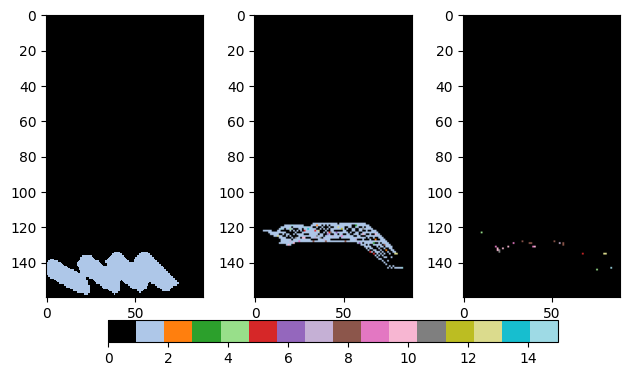

In [10]:
idx = 1

draw_plot(idx)